<a href="https://colab.research.google.com/github/aminehd/Linalg18065/blob/main/psets/pset2sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 18.085 Problem Set 2 Solutions

## Problem 1 (5+5+5 points)

**(a)** The eigenvalues of a real *anti-Hermitian* matrix $A = -A^T$ must be \_\_\_\_\_\_\_\_\_\_\_\_.   Derive this by considering $\overline{x^T} A x$ for an eigenvector $Ax = \lambda x$, and demonstrate it numerically by constructing a random anti-Hermitian matrix `A = randn(n,n); A = A - A'` in Julia and looking at its eigenvalues `using LinearAlgebra; eigvals(A)` for `n=4` and `n=5`.  (You might want to try the numerical experiment first if you aren't sure what the answer is.)

**(b)** Suppose $A$ is a $3 \times 3$ real-symmetric matrix with eigenvalues $\lambda_1 = -2$, $\lambda_2 = 3$, and $\lambda_3 = -1$, with corresponding orthonormal eigenvectors $q_1, q_2, q_3$.  In terms of these quantities, give the (full) SVD of $A$.

**(c)** Construct a random $5 \times 3$ matrix `A = randn(5, 3)` and form a related *real-symmetric* matrix `B = [ 0I A; A' 0I ]`, corresponding to
$$
B = \begin{pmatrix} 0 & A \\ A^T & 0 \end{pmatrix} .
$$
Compare the eigenvalues of $B$ (`eigvals(B)`) to the singular values of $A$ (`svdvals(A)`).  What do you notice?  Explain it by using the SVD $A = U \Sigma V^T$ to construct eigenvalues and eigenvectors of $B$.

### Solution:

**(a)** Let's try it in Julia first:

In [1]:
using LinearAlgebra

for n in (4, 5)
    A = randn(n, n)
    A = A - A'
    println("n = $n, eigvals = ", eigvals(A))
end

n = 4, eigvals = ComplexF64[-4.85722573273506e-17 - 0.1376549274929871im, -4.85722573273506e-17 + 0.1376549274929871im, 5.551115123125783e-17 - 4.401799259249947im, 5.551115123125783e-17 + 4.401799259249947im]
n = 5, eigvals = ComplexF64[3.6429744636174766e-17 + 0.0im, 7.28583859910259e-17 - 4.403360406879091im, 7.28583859910259e-17 + 4.403360406879091im, 2.498001805406602e-16 - 1.5667798641388206im, 2.498001805406602e-16 + 1.5667798641388206im]


Looking closely, we see that the imaginary parts of tiny compared to the real parts — not including roundoff errors, the **eigenvalues are purely imaginary (or zero)**.  Moreover, because $A$ is real, the **eigenvalues come in complex-conjugate pairs** $\lambda = \pm i \alpha$ except for $\lambda = 0$ (which only appears for **odd n** since the number of eigenvalues equals n).

How do we prove this?  Suppose $Ax = \lambda x$ for a real $A = -A^T =--\overline{A^T}$ and $x \ne 0$ (which may be complex!), and follow the hint and consider
$$
\overline{x^T} A x = \lambda \Vert x \Vert^2 = \overline{(A^T x)^T} x = \overline{(-A x)^T} x = -\bar{\lambda} \Vert x \Vert^2 \, ,
$$
so it follows that $\boxed{\lambda = -\bar{\lambda}}$, i.e. $\lambda$ must be purely imaginary (or zero).

(The fact that they come in complex-conjugate pairs follows for any real $A$ simply by conjugating both sides of the eigen-equation: $\overline{Ax = \lambda x} \implies A\bar{x} = \bar{\lambda} \bar{x}$, so $\bar{\lambda}$ is also an eigenvalue.)

**(b)** We have
$$
A = \begin{pmatrix} q_1 & q_2 & q_3 \end{pmatrix} \begin{pmatrix} -2 & & \\ & 3 & \\ & & -1 \end{pmatrix} \begin{pmatrix} q_1 & q_2 & q_3 \end{pmatrix}^T
$$
which *almost* looks like an SVD except that the singular values must be nonnegative.  So, we just need to flip the signs of the negative eigenvalues, and flip the signs of *one* of the corresponding q's.  There are multiple possible choices of sign:
$$
A = \underbrace{\begin{pmatrix} \pm q_1 & \pm q_2 & \pm q_3 \end{pmatrix}}_U \underbrace{\begin{pmatrix} 2 & & \\ & 3 & \\ & & 1 \end{pmatrix}}_\Sigma \underbrace{\begin{pmatrix} \mp q_1 & \pm q_2 & \mp q_3 \end{pmatrix}^T}_{V^T}
$$
where the signs on the left match with the corresponding signs on the right.  (For example, either $u_1 = +q_1$ and $v_1 = -q_1$ *or* $u_1 = -q_1$ and $v_1 = +q_1$.)

**(c)** Let's see what happens:

In [ ]:
A = randn(5, 3)
B = [ 0I A; A' 0I ]
@show svdvals(A)
@show eigvals(B);

svdvals(A) = [2.1323056982359665, 1.4445123720679864, 0.9221317940231752]
eigvals(B) = [-2.132305698235967, -1.4445123720679862, -0.9221317940231751, -1.0779172922296461e-17, 1.0779172922296461e-17, 0.9221317940231744, 1.4445123720679878, 2.1323056982359665]


By inspection, the **nonzero eigenvalues of B are ± the singular values of A!**

To explain this, we should be able to take a singular value $\sigma_k$ of $A$ and the corresponding singular vectors $u_k, v_k$, and somehow construct eigenvectors of $B$ for $\lambda = \pm \sigma_k$.   Recall from class that $A v_k = \sigma_k u_k$, and similarly $A^T u_k = \sigma_k v_k$.   By inspection of $B$, after a little thought we can see that this means that:
$$
\underbrace{\begin{pmatrix} 0 & A \\ A^T & 0 \end{pmatrix}}_B \begin{pmatrix} u_k \\ \pm v_k \end{pmatrix} = \begin{pmatrix} \pm A v_k \\ A^T u_k \end{pmatrix} = \begin{pmatrix} \pm \sigma_k u_k \\ \sigma_k v_k \end{pmatrix} = \underbrace{\pm \sigma_k}_\lambda \boxed{ \begin{pmatrix} u_k \\ \pm v_k \end{pmatrix} } \, ,
$$
so the boxed quantity is, by construction, and eigenvector of $B$ with eigenvalue $\pm \sigma_k$.

What about the zero eigenvalues of $B$?  Those come from $N(A)$ and $N(A^T)$.   In particular, recall that $u_{r+1},\ldots,u_m$ are an orthonormal basis for $N(A^T)=C(A)^\perp$ and $v_{r+1},\ldots,v_n$ are an orthonormal basis for $N(A)=C(A^T)^\perp$.  For each of these nullpace vectors, we have:
$$
B \begin{pmatrix} u_k \\ \vec{0} \end{pmatrix} = \begin{pmatrix} \vec{0} \\ A^Tu_k \end{pmatrix} = 0, \qquad
B \begin{pmatrix} \vec{0} \\ v_k \end{pmatrix} = \begin{pmatrix}  Av_k \\ \vec{0}  \end{pmatrix} = 0
$$
i.e. there are $(m-r)+(n-r)=m+n-2r$ orthogonal vectors in $N(B)$.  In this particular case, that corresponds to $(5-3)+(3-3)=2$ vectors in $N(B)$, yielding the two zero (up to roundoff errors) eigenvalues of $B$ seen above from `eigvals(B)`.

## Problem 2  (6+6 points)

**(a)** For any $m \times n$ real matrix $A$ and any real unitary $m \times m$ matrix $Q_1$ and any real unitary $n \times n$ matrix $Q_2$, show that $\Vert A \Vert$ = $\Vert Q_1 A Q_2 \Vert$ for the norms:
$$
\Vert A \Vert_2 = \max_{x\ne 0} \frac{\Vert A x \Vert_2}{\Vert x \Vert_2}\, , \; \; \Vert A \Vert_F = \sqrt{\text{tr}(A^T A) } \, .
$$
Do *not* use the relationships of these norms to the singular values of $A$, from class; use only the definitions above.  (Hint: a change of variables may be useful for the first norm, and the cyclic property of the trace for the second.)

**(b)** Using the full SVD $A = U \Sigma V^T$ and the unitary invariance from part (a), show that $\Vert A \Vert_2 = \sigma_1$ and $\Vert A \Vert_F = \sqrt{\sum_k \sigma_k^2}$.

### Solution:

**(a)** For the induced norm, we have:
$$
\Vert Q_1 A Q_2 \Vert_2 = \max_{x\ne 0} \frac{\Vert Q_1 A Q_2 x \Vert_2}{\Vert x \Vert_2} \\
= \max_{x\ne 0} \frac{\Vert A \overbrace{Q_2 x}^y \Vert_2}{\Vert x \Vert_2} = \max_{y\ne 0} \frac{\Vert A y \Vert_2}{\Vert Q_2^T y \Vert_2}  = \max_{y\ne 0} \frac{\Vert A y \Vert_2}{\Vert y \Vert_2} = \Vert A \Vert_2
$$
where we have used the fact that $\Vert Q z \Vert_2 = \Vert z \Vert_2$, from class, for any unitary $Q$ (and note that $Q^T$ is also unitary!), and did a change of variables $y = Q_2 x \Longleftrightarrow x = Q_2^T y$.

For the Frobenius norm, we have:
$$
\Vert Q_1 A Q_2 \Vert_F = \sqrt{\text{tr}(Q_2^T A^T Q_1^T Q_1 A Q_2) } \\
= \sqrt{\text{tr}(Q_2^T A^T  A Q_2) } = \sqrt{\text{tr}(Q_2 Q_2^T A^T  A) } = \sqrt{\text{tr}(A^T  A) } = \Vert A \Vert_F \, ,
$$
where on the second line we used the cyclic property of the trace to move the $Q_2$ factor to the left and cancel it with $Q_2 Q_2^T = I$.

**(b)** From part (a), since U, V are unitary, we have $\Vert A \Vert = \Vert U \Sigma V^T \Vert = \Vert \Sigma \Vert$ in both norms ($Q_1 = U$ and $Q_2 = V^T$).   Now, we simply need to calculate them.  Both calculations will involve the $n \times n$ matrix (for $A$ being $m \times n$):
$$
\Sigma^T \Sigma = \begin{pmatrix} \sigma_1^2 & & & & \\
 & \ddots & & & \\
 & & \sigma_r^2 & & \\
 & & & 0 & \\
 & & & & \ddots \end{pmatrix}
$$

For the induced norm, the calculation is very similar to problem 2:
$$
\Vert A \Vert_2 = \Vert \Sigma \Vert_2 = \max_{x\ne 0} \frac{\Vert \Sigma x \Vert_2}{\Vert x \Vert_2} = \sqrt{\max_{x\ne 0} \frac{\Vert \Sigma x \Vert_2^2}{\Vert x \Vert_2^2}} = \sqrt{\max_{x\ne 0} \frac{x^T \Sigma^T \Sigma x}{x^T x}} \\
= \sqrt{\max_{x\ne 0} \frac{\sum_{i=1}^r \sigma_i^2 x^2}{\sum_{j=1}^n x_j^2} } \le \sqrt{\max_{x\ne 0} \frac{\sum_{i=1}^n \sigma_1^2 x^2}{\sum_{j=1}^n x_j^2} } = \sigma_1
$$
(a weighted average of $\sigma_i^2$ bounded above by $\sigma_1^2$ just as in problem 2).

For the Frobenius norm case, it's even easier, because we just have the trace of a diagonal matrix $\Sigma^T \Sigma$:
$$
\Vert A \Vert_F = \Vert \Sigma \Vert_F = \sqrt{\text{tr}(\Sigma^T \Sigma) } = \sqrt{\sigma_1^2 + \cdots \sigma_r^2}.
$$

## Problem 3 (5+5 points)

Find a closest-rank-1 matrix (in the Frobenius norm, for example) to:

**(a)** $A = \begin{pmatrix} 0 & 3 \\ 2 & 0 \end{pmatrix}$

**(b)** $A = \begin{pmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{pmatrix}$ (where $\theta$ is some real number).

You should be able to do your calculations completely by hand (it's not too hard, honest!), but of course you may use Julia to check your answers if you wish.

### Solution

For both parts, by the Eckhart–Young theorem, we simply need to find the SVD of $A$ and use $\sigma_1 u_1 v_1^T$ as our rank-1 approximation.  Fortunately, for both of these matrices it is easy to find the SVD by hand.

**(a)** Let's find the SVD by looking at eigenvalues and eigenvectors of
$$
A^T A = \begin{pmatrix} 4 & 0 \\ 0 & 9 \end{pmatrix} \, .
$$
Since this is diagonal, we can read off the eigenvalues (4 and 9) and hence the singular values are $\sigma_{1} = 3$ and $\sigma_2 = 2$.   The corresponding eigenvectors are $v_1 = [0,1]$ and $v_2 = [1,0]$.  We also need $u_1 = Av_1 / \sigma_1 = [3, 0] / 3 = [1, 0]$.  Hence, our best rank-1 approximation is:
$$
\sigma_1 u_1 v_1^T = 3 \begin{pmatrix} 1 \\ 0 \end{pmatrix} \begin{pmatrix} 0 & 1 \end{pmatrix} = \boxed{\begin{pmatrix} 0 & 3 \\ 0 & 0 \end{pmatrix}} \, .
$$

**(b)** This is the unitary 2x2 rotation matrix, from class, with $A^T A = I$.   So, its singular values are $\sigma_1 = \sigma_2 = 1$, and for its singular vectors we can use *any* unitary matrices with $U = A V \Sigma = AV$, e.g. $V=I$ and $U=A$ is one possibility.  Since neither singular value is bigger than the other, moreover, there are **infinitely many** choices of "best rank-1 approximations" that are all **equally good**.  In particular, we can take *any* unit vector $v_1$ and the corresponding (rotated) unit vector $u_1 = A v_1$.  For example, $v_1 = [1, 0]$ gives:
$$
\sigma_1 u_1 v_1^T = \begin{pmatrix} \cos\theta & 0 \\ \sin\theta & 0 \end{pmatrix} \, .
$$
as one possibility.   (In fact, any single row or column of $A$ works.)

## Problem 4 (4+6+4 points)

For an $m \times m$ real-symmetric matrix $S = S^T$, we know that we have real eigenvalues $\lambda_1 \ge \lambda_2 \ge \cdots \ge \lambda_m$ and can find an orthonormal basis of eigenvectors $Q = \begin{pmatrix} q_1 & \cdots & q_m \end{pmatrix}$.   So, we can write any vector $x \in \mathbb{R}^m$ as $x = Qc = q_1 c_1 + \cdots q_m c_m$ for some coefficient $c$.

**(a)** Show that $x^T x = c_1^2 + \cdots + c_m^2$ and $x^T S x = \lambda_1 c_1^2 + \cdots + \lambda_m c_m^2$.

**(b)** Show that the **Rayleigh quotient**
$$
R(x) = \frac{x^T S x}{x^T x}
$$
is *maximized* (over *any* possible $x \ne 0$, not just eigenvectors) by $R(q_1) = \lambda_1$.

**(c)** If $A$ is any $m \times n$ real matrix, we know that the squared singular values $\sigma_i^2$ are the nonzero eigenvalues of $A^T A$.  Use this fact, combined with part (b), to give an alternative proof of why
$$
\Vert A \Vert_2 = \max_{x\ne 0} \frac{\Vert A x \Vert_2}{\Vert x \Vert_2} = \sigma_1
$$

## Solution:

**(a)** $x=Qc$ implies $x^T x = (Qc)^T (Qc) = c^T Q^T Q c = c^T c = c_1^2 + \cdots + c_m^2$.  (We could also do the same thing term-by-term, of course.)   Similarly, $x^T S x = c^T Q^T S Q c$, but $Q^T S Q = \Lambda$ (eigenvectors **diagonalize** the matrix!), so $x^T S x = c^T \Lambda c = \lambda_1 c_1^2 + \cdots + \lambda_m c_m^2$.

**(b)** From part (a), by expanding an arbitrary $x$ in our eigenvector basis $Q$, we have:
$$
R(x) = \frac{\sum_i \lambda_i c_i^2}{\sum_j c_j^2} \, ,
$$
which is just a **weighted average** of the λ's!  Intuitively, an average must be smaller than the biggest λ, but we can show this explicitly quite easily.  Since each of the $c_i^2$ is $\ge 0$, we can make the numerator bigger by replacing each $\lambda_i$ with $\lambda_1$, i.e.
$$
R(x) \le \frac{\sum_i \boxed{\lambda_1} c_i^2}{\sum_j c_j^2} =
\boxed{\lambda_1} \frac{\sum_i  c_i^2}{\sum_j c_j^2} = \boxed{\lambda_1}.
$$

**(c)** The trick is simply to observe (as we did in class for least-square problems) that maximizing a positive quantity is equivalent to maximizing its square:
$$
\Vert A \Vert_2 = \max_{x\ne 0} \frac{\Vert A x \Vert_2}{\Vert x \Vert_2} = \sqrt{\max_{x\ne 0} \frac{\Vert A x \Vert_2^2}{\Vert x \Vert_2^2} } = \sqrt{\max_{x\ne 0} \frac{x^T A^T A x}{x^T x} } = \sqrt{\max_{x\ne 0} R(x) }
$$
The final expression is simply the Rayleigh quotient for $S = A^T A$.   Hence, the maximum $R(x)$ is, by part (b), the biggest eigenvalue of $A^T A$, which is $\sigma_1^2$.   Then
$$
\Vert A \Vert_2 = \sqrt{\sigma_1^2} = \sigma_1 \, .
$$

## Problem 5 (6+6 points)

The following problem is adapted from the [VMLS book](https://web.stanford.edu/~boyd/vmls/), additional [exercise 13.3](https://web.stanford.edu/~boyd/vmls/vmls-additional-exercises.pdf):

![image.png](attachment:image.png)

**(a)** Describe the **size** and **entries** of the matrix $A$ and the vector $b$ for which $J = \Vert A\beta - b\Vert^2 / (N-M)$.  This allows you to find the coefficients $\beta$ that minimize $J$, i.e. the auto-regressive predictor that minimizes the mean-square prediction error, simply by solving a standard least-square problem (`β = A \ b` in Julia).

**(b)** Implement an autoregressive model to predict German residential power demand with data from [this tutorial](https://vitalflux.com/autoregressive-ar-models-with-python-examples/#:~:text=Autoregressive%20models%20are%20based%20on,going%20up%20in%20the%20future.) via the code below.

* Fill in the `???` in the `autoregressive_model` to form `A, b` according to (a) for given data `x` and `M`.
* Apply it for `M=8` to find the prediction coefficients $\beta$ from "training" data consisting of the power-demand data excluding the last 100 days.
* Use the last 100 points as "test" data: compare the predictions of your fitted model by plotting the predictions for the last 100 days along with the actual data (fill in the ???).

In [ ]:
# download the raw data (CSV file)
import Downloads
datafile = Downloads.download("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")

"/var/folders/q9/2vfl1wt51558xwpl4nv4wt580000gn/T/jl_DIfs34Bc5M"

4384×5 Matrix{Any}:
 "Date"            "Consumption"     "Wind"    "Solar"     "Wind+Solar"
 "2006-01-01"  1069.18               ""        ""          ""
 "2006-01-02"  1380.52               ""        ""          ""
 "2006-01-03"  1442.53               ""        ""          ""
 "2006-01-04"  1457.22               ""        ""          ""
 "2006-01-05"  1477.13               ""        ""          ""
 "2006-01-06"  1403.43               ""        ""          ""
 "2006-01-07"  1300.29               ""        ""          ""
 "2006-01-08"  1207.98               ""        ""          ""
 "2006-01-09"  1529.32               ""        ""          ""
 "2006-01-10"  1576.91               ""        ""          ""
 "2006-01-11"  1577.18               ""        ""          ""
 "2006-01-12"  1553.28               ""        ""          ""
 ⋮                                                      
 "2017-12-20"  1559.69             90.88      8.799      99.679
 "2017-12-21"  1520.37            259.039  

summary(days) = "4383-element Vector{Int64}"
summary(consumption) = "4383-element Vector{Float64}"


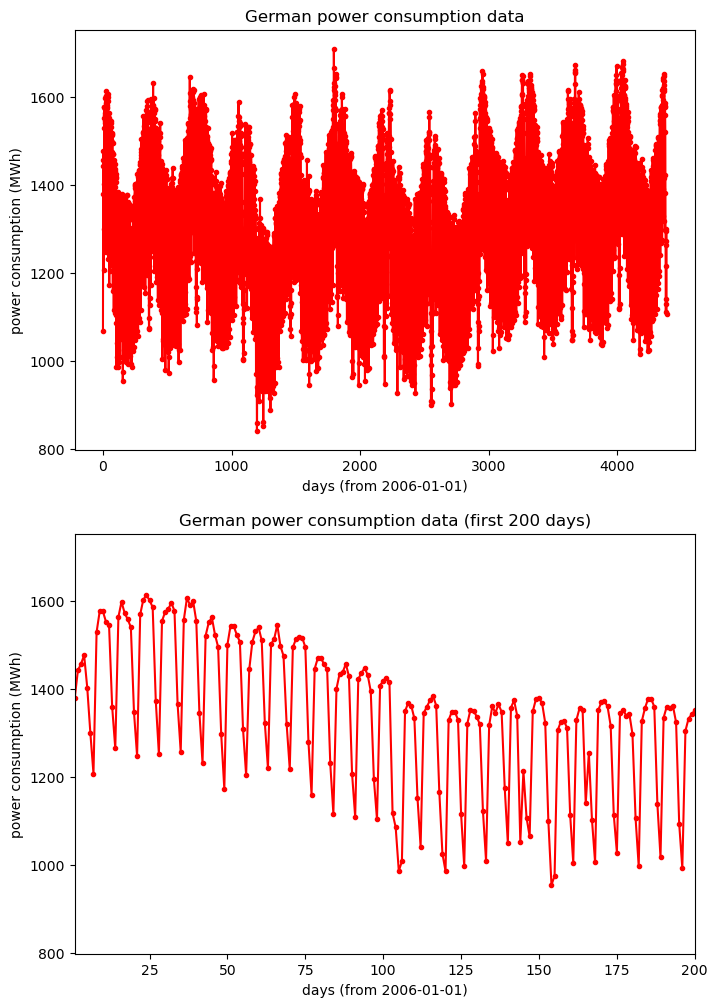

(1.0, 200.0)

In [ ]:
# extract the data and plot it:

using DelimitedFiles, Dates
data = readdlm(datafile, ',')
display(data)
dates = parse.(Date, data[2:end, 1])
days = Dates.value.(dates .- dates[1])
consumption = Float64.(data[2:end, 2])
@show summary(days)
@show summary(consumption)

using PyPlot

figure(figsize=(8,12))
subplot(2,1,1)
title("German power consumption data")
plot(days, consumption, "r.-")
xlabel("days (from 2006-01-01)")
ylabel("power consumption (MWh)")

subplot(2,1,2)
title("German power consumption data (first 200 days)")
plot(days, consumption, "r.-")
xlabel("days (from 2006-01-01)")
ylabel("power consumption (MWh)")
xlim(1,200)

### Solution:

**(a)** The main thing is to express the "prediction" vector $\hat{x} = [\hat{x}_{M+1}, \ldots \hat{x}_{N}] = A\beta$ as a matrix $A$ times the vector $\beta = [\beta_1, \ldots, \beta_M]$ of coefficients.  By inspection of the formula for $\hat{x}_{t+1}$ above, this is:
$$
\underbrace{\begin{pmatrix} \hat{x}_{M+1} \\ \hat{x}_{M+2} \\ \vdots \\ \hat{x}_{N} \end{pmatrix}}_{\hat{x}}
= \boxed{\underbrace{\begin{pmatrix} x_M & x_{M-1} & \cdots & x_{1} \\
x_{M+1} & x_{M} & \cdots & x_{2} \\
\vdots & \vdots & \vdots & \vdots \\
x_{N-1} & x_{N-2} & \cdots & x_{N-M}
\end{pmatrix}}_{A}} \underbrace{\begin{pmatrix} \beta_{1} \\ \beta_2 \\ \vdots \\ \beta_M \end{pmatrix}}_\beta \,
$$
where $A$ is an $\boxed{(N-M) \times M}$ matrix.  The "right-hand-side" vector $b$ is then simply the actual $x_{t}$ values to compare to the predictions $\hat{x}$: $\boxed{b = [x_{M+1}, x_{M+2}, \ldots, x_N]}$.

**(b)** We fill in the code below to construct our $A$ and $b$ from part (a):

In [ ]:
# fill in the ??? to get A and b from x and m
function autoregressive_model(x, M)
    N = length(x)
    A = similar(x, N-M, M) # allocate an (N-M)×M matrix A
    for i = 1:size(A,1) # fill in A row-by row
        t = M-1+i
        A[i,:] = x[t:-1:t-M+1] # x[t], x[t-1], …, x[t-M+1]
    end
    b = x[M+1:N] # x[M+1], x[M+2], …, x[N]
    return A, b
end

training_data = consumption[1:end-100]

# construct your A and b from M=8 and find β
M = 8
A, b = autoregressive_model(training_data, M)
β = A \ b # least-square fit

8-element Vector{Float64}:
  0.6478100500722224
 -0.08569044106766723
  0.08122941854537981
 -0.041598056840006246
  0.0030540247873219683
  0.07540381091515796
  0.7940857504360963
 -0.4748195773198859

Now, to get the predictions for the "test data" (the predictions for the last 100 points), we can use the same `autoregressive_model` code!  Remember that the predictions are simply $A\beta$, so we just construct a new "A" matrix from the test data.

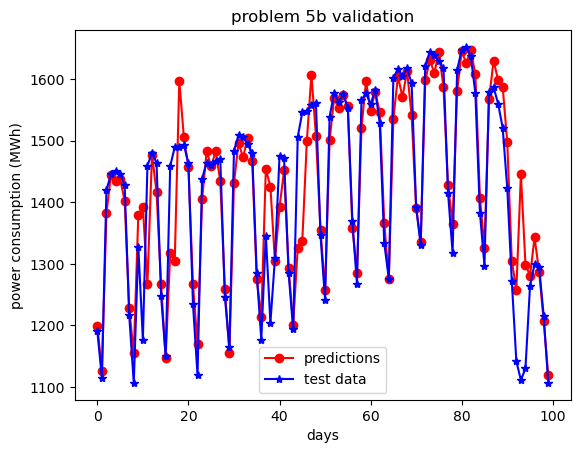

PyObject Text(24.0, 0.5, 'power consumption (MWh)')

In [ ]:
# test data from last 100+M points:
test_data = consumption[end-99-M:end]

# plot the predictions for the last 100 points along with test data

A_test, b_test = autoregressive_model(test_data, M)
predictions = A_test * β

plot(predictions, "ro-")
plot(test_data[end-99:end], "b*-")
legend(["predictions", "test data"])
title("problem 5b validation")
xlabel("days")
ylabel("power consumption (MWh)")

The predictions aren't too bad looking!

(Note that it is *always* a good idea to add some proper labels to the plot.)

## Problem 6 (8 points)

Show that the pseudo-inverse $A^+$ obeys $AA^+A=A$ and $A^+ A A^+ = A^+$.

### Solution:

We have $A = U\Sigma V^T$ and $A^+ = V\Sigma^+ U^T$, so:
$$
AA^+A = U\Sigma V^T V\Sigma^+ U^T U\Sigma V^T = U\Sigma \Sigma^+ \Sigma V^T
$$
where the unitary terms cancel.  All we need to do now is to show that $\Sigma \Sigma^+ \Sigma = \Sigma$ in order to get $A$.  Suppose $A$ is $m \times n$ with rank $r$.  It might be square, wide, or tall, and it might be rank-deficient.  In general, we have:
$$
\Sigma \Sigma^+ \Sigma =
\underbrace{\begin{pmatrix} \sigma_1 & & & & 0's\\
                & \sigma_2 & & & 0's \\
                & & \ddots & \\
                & & & \sigma_r & 0's\\
                0's & 0's& 0's & 0's & 0's\end{pmatrix}}_{\Sigma: \; m \times n}
\underbrace{\begin{pmatrix} 1/\sigma_1 & & & & 0's\\
                & 1/\sigma_2 & & & 0's \\
                & & \ddots & \\
                & & & 1/\sigma_r & 0's\\
                0's & 0's& 0's & 0's & 0's\end{pmatrix}}_{\Sigma^+: \; n \times m} \Sigma \\
= \underbrace{\begin{pmatrix} 1 & & & & 0's\\
                & 1 & & & 0's \\
                & & \ddots & \\
                & & & 1 & 0's\\
                0's & 0's& 0's & 0's & 0's\end{pmatrix}}_{\Sigma\Sigma^+: \; m \times m}
  \underbrace{\begin{pmatrix} \sigma_1 & & & & 0's\\
                & \sigma_2 & & & 0's \\
                & & \ddots & \\
                & & & \sigma_r & 0's\\
                0's & 0's& 0's & 0's & 0's\end{pmatrix}}_{\Sigma: \; m \times n} = \Sigma
$$
so we are done!

The proof is nearly the same for $A^+ A A^+$, since
$$A^+ A A^+ = V\Sigma^+ U^T U\Sigma V^T V\Sigma^+ U^T = V\Sigma^+ \Sigma \Sigma^+ U^T
$$
so we simply have to show that $\Sigma^+ \Sigma \Sigma^+ = \Sigma^+$.  The algebra is identical to above except that we swap $m \leftrightarrow n$ and $\sigma \leftrightarrow 1/\sigma$.

## Problem 7 (6+6 points)

In this problem you will use **principal components analysis (PCA)** and the SVD to classify a images.

The code below downloads a [collection of 80 monochrome/grayscale drawings](https://math.mit.edu/~stevenj/snow.zip) of [snowpeople](https://en.wikipedia.org/wiki/Snowman) and [snowflakes](https://en.wikipedia.org/wiki/Snowflake) found by a google image search in Spring 2023.

Each image is resized to a common size of $156 \times 128$, and then reshaped into a vector of $156\times 156 = 19968$ numbers (the grayscale intensity of each pixel), and stored in a matrix $X$ of "measurements" for 80 images:
$$
X = 19968 \times 80 \mbox{ matrix} = \mbox{(data per image)} \times \mbox{(# images)}
$$
Think of this as 80 points in a **19968-dimensional space**, i.e. each image is a point in $\mathbb{R}^{19968}$!!

PCA allows us to figure out which combinations of these 19968 variables explain most of the variations, and allows us to *project* from $\mathbb{R}^{19968}$ to a *much* lower-dimensional space in order to help us *classify* the data and identify *clusters* of similar images.   In this problem (parts a and b, below), you will perform the PCA clustering analysis yourself.

You will need to install some Julia packages to help extract the image data.  
```jl
import Pkg
Pkg.add("ZipFile")
Pkg.add("Images")
Pkg.add("FileIO")
```
(or type `] add ZipFile Images FileIO`).

You can then run the following code to download the data and reshape it into our $X$ matrix:

In [ ]:
using ZipFile, Images, FileIO, Statistics, LinearAlgebra, PyPlot

# download the files as a zip archive:
imagezip = download("https://math.mit.edu/~stevenj/snow.zip")

"/var/folders/q9/2vfl1wt51558xwpl4nv4wt580000gn/T/jl_leVCLcRON8"

In [ ]:
rows, cols = 156,128  # common size to resize all of the images to

# extract the images from the zip file, load them, resize them, and stick them into a big array Xdata
Xdata = Float64[]
r = ZipFile.Reader(imagezip)
for f in r.files
    # load image and rescale to rows x cols
    image = imresize(load(IOBuffer(read(f))), rows, cols)
    imagedata = Float64.(channelview(image))
    if length(imagedata) == rows*cols # grayscale
        # convert to RGB
        bw = vec(imagedata)
        imagedata = permutedims([bw bw bw])
    elseif size(imagedata, 1) == 4 # RGBA
        α = reshape(imagedata[4, :, :], 1, rows, cols) # alpha (transparency)
        # convert to RGB, with transparent pixels converted to white:
        imagedata = imagedata[1:3, :, :] .* α .+ (1 .- α)
    end
    # convert back to grayscale (average RGB channels) and collect in Xdata
    append!(Xdata, reshape(mean(imagedata, dims=1), rows, cols))
end

# array of file names, and indices of snowflakes vs snowpeople
names = [f.name for f in r.files]
snowperson_indices = findall(startswith("s"), names)
snowflake_indices = findall(startswith("f"), names)

# reshape into 19968x80 matrix X
X = reshape(Xdata, :, length(r.files)) # reshape to (imagesize) x (numimages) matrix
@show size(X)

# a useful function to reshape a vector into a BW image and plot it
function plotimg(imgdata, rows=rows, cols=cols)
    u = copy(imgdata)
    u .-= minimum(u)
    u ./= maximum(u)
    imshow(reshape(u, rows, cols), cmap="gray")
    axis("off")
end

size(X) = (19968, 80)


plotimg (generic function with 3 methods)

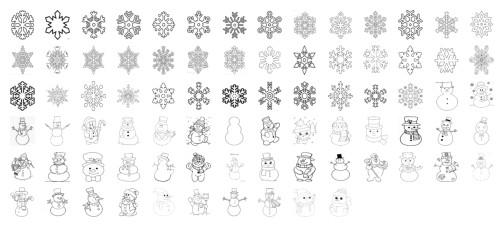

In [ ]:
# first, let's plot all of the images to make sure they look okay:
figure(figsize=(6.3, 3.15))
r, c = 7, 14
for i = 1:r, j=1:c
    k = (i-1)*c + j
    k > size(X,2) && break
    subplot(r, c, k)
    plotimg(X[:,k])
end

**(a)** Fill in the code below to compute the matrix `A` with the *mean of each pixel* (over all images) subtracted, and take its SVD to plot the singular values.

(Be careful: some treatments of PCA put the different samples in the rows of $X$ and $A$, and some put the samples in the columns.  Which are we doing here?)

### Solution (a):

Here, the different "samples" (images) are in the *columns*, so we need to take the *mean of all the columns (images)* and subtract this "mean image" from each *column*.

We can do this in a variety of ways, e.g. by using the `mean(X, dims=2)` function from the built-in `Statistics` module to take the average along the 2nd (column) direction, then subtracting this from `X` with `.-` (broadcasting):

In [ ]:
A = A1 = X .- mean(X, dims=2);

Alternatively, we can apply the projection matrix $P = I - \frac{oo^T}{o^T o}$ as in class, except that now we need to apply this projection *from the right* to average columns instead of rows.

Note also that, as in pset 1, it is critically important to parenthesize things carefully so that we don't end up multiplying large matrices.  We want:
$$
A=XP^T = XP = X - \frac{(Xo)o^T}{o^T o}
$$
so that we only do vector–matrix and vector–vector products, never matrix–matrix:

In [ ]:
o = ones(size(X,2))
A2 = X - (X*o)*(o' / o'o);

# let's check that it is the same A:
A1 ≈ A2

true

Now, we'll plot the singular values:

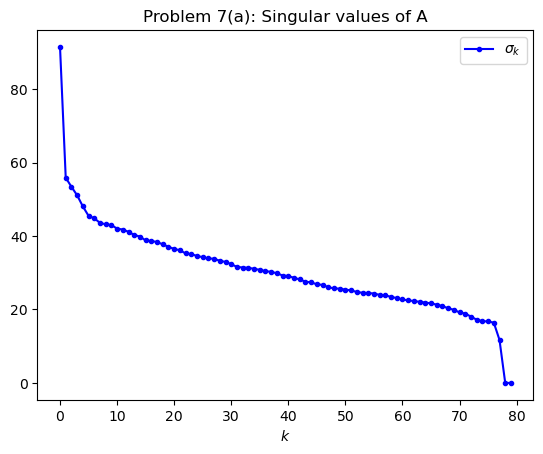

In [ ]:
U, σ, V = svd(A);

plot(σ, "b.-")
title("Problem 7(a): Singular values of A");
xlabel(L"k");
legend([L"\sigma_k"]);

As desired, a "lot" (well, 13%) of the variance is explained by the first couple of singular values:

In [ ]:
sum(σ[1:2].^2) / sum(σ.^2) # fraction of variance in σ₁ and σ₂

0.1330148445724591

**(b)** Compute the projections `c1[i]` and `c2[i]` of each image
onto the dominant two principal components (vectors u or v in this case?).  That is, reduce the 19968-dimensional data to **2 dimensions**.

(Does it matter much whether you do the projection to the images in $A$ or $X$?  Why or why not?)

Run the code below to plot `c2` vs `c1` for every image, coloring the points corresponding to snowpeople blue and the points corresponding to snowflakes red.  Hopefully, in this 2d projection, you will see
different types of images separated into mostly distinct coordinate regions, with similar images clustered together.

### Solution (b):

We need a basis vector for the *images*, so we need $\boxed{u_1 \text{ and } u_2}$ (which have the same length as an image).  Equivalently, since the samples are the columns, we need to diagonalize the covariance $AA^T = U \Sigma\Sigma^T U^T$ (*not* $A^T A$), corresponding to the left singular vectors $U$.

Since we want the dot product of each *column* of $A$ with $u_k$, this means that we want $\boxed{c_k = A^T u_k}$.

It doesn't really matter much whether we do the projection on the images in $A$ or $X$, since they only differ by a constant vector (the average image $x_a$).  That is, $A^T u_k$ and $X^T u_k$ differ only by a *constant* $x_a^T u_k$ in each component, so the difference between $X$ and $A$ here is only an *overall shift* in our coordinate system $(c_1, c_2)$.

In [ ]:
c1 = A' * U[:,1]; # Aᵀu₁
c2 = A' * U[:,2]; # Aᵀu₂

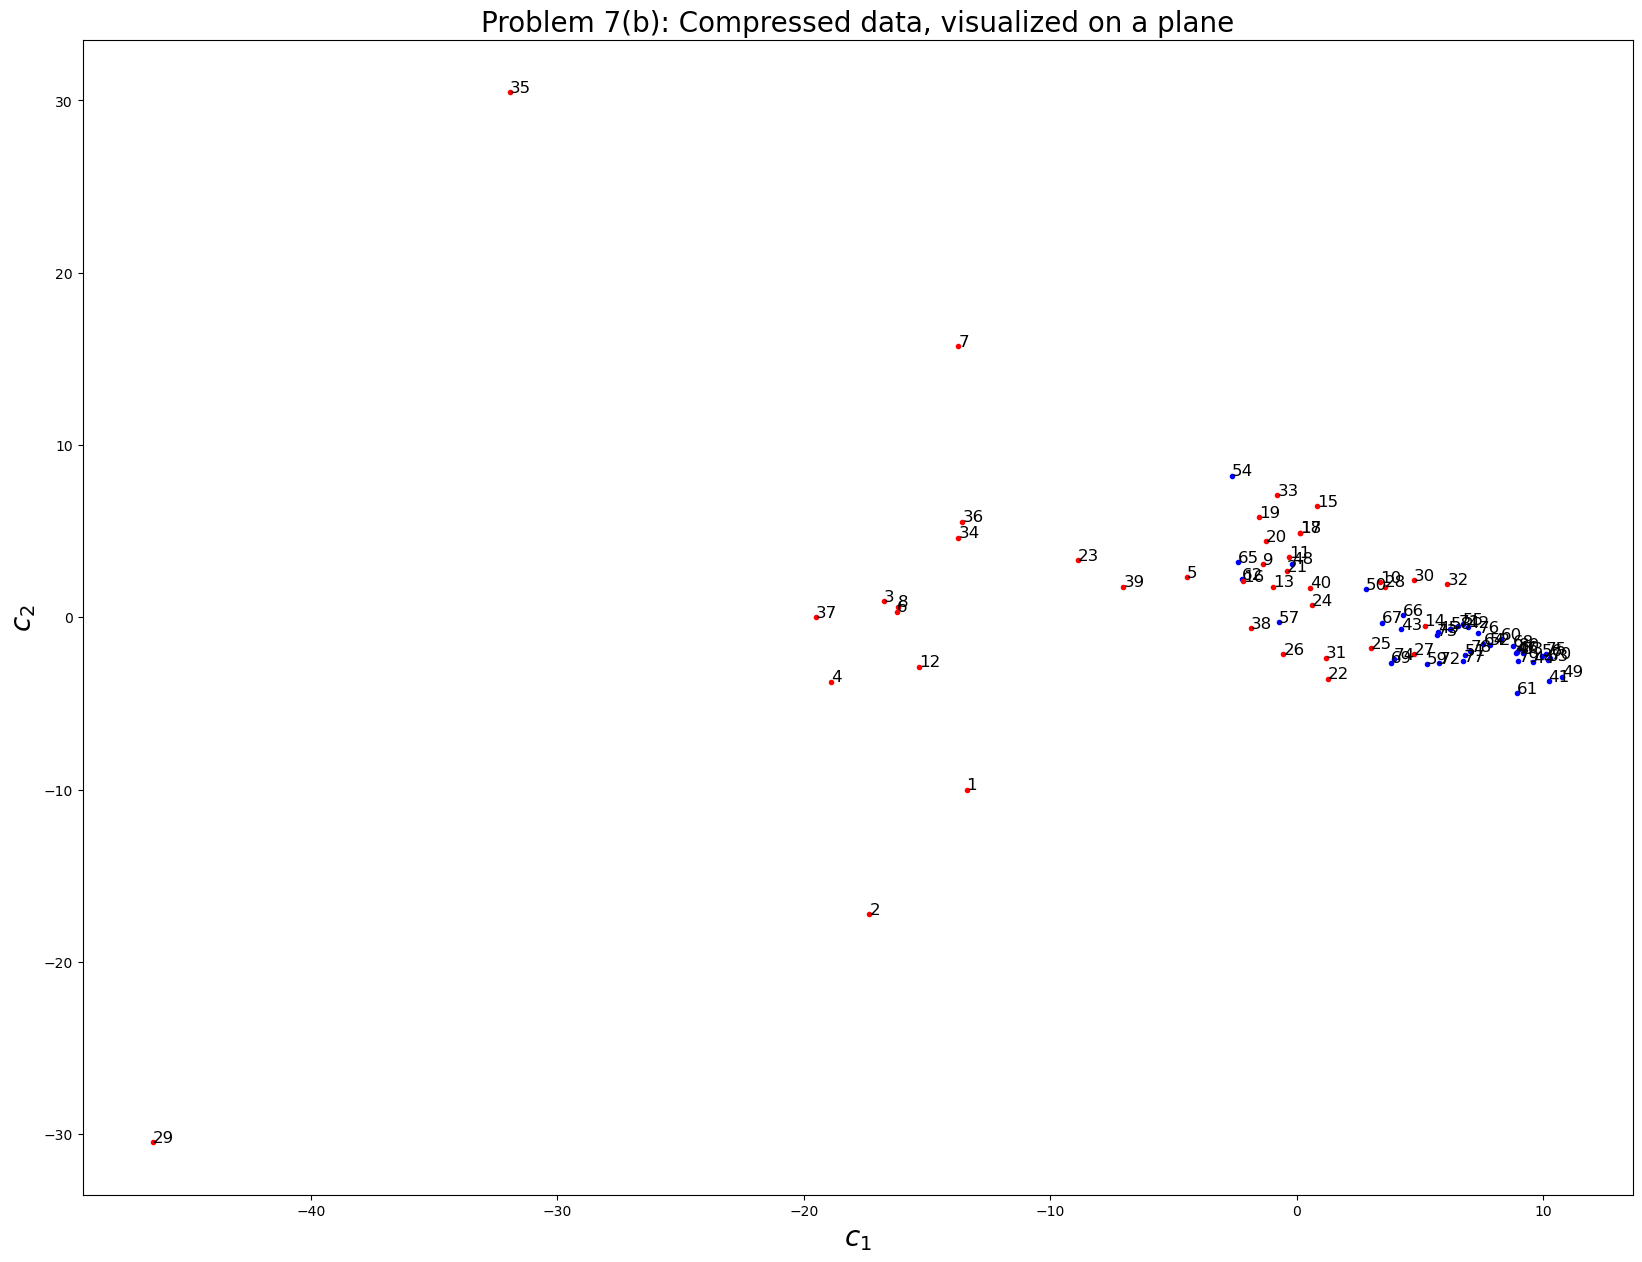

In [ ]:
figure(figsize=(20,15))
plot(c1[snowperson_indices], c2[snowperson_indices], "b.")
plot(c1[snowflake_indices], c2[snowflake_indices], "r.")
text.(c1, c2, string.(1:length(c1)), fontsize=12);

title("Problem 7(b): Compressed data, visualized on a plane", fontsize=20);
xlabel(L"$c_1$", fontsize=20);
ylabel(L"$c_2$", fontsize=20);

As desired, the blue points (the "snow-people") are clustered together at the right, mostly separated from the red points (the "snowflakes") to the left.

In fact, we **mostly just need `c1`** to discriminate between snow-people and snowflakes.   It is instructive to show this by a histogram of the images vs $c_1$ alone:

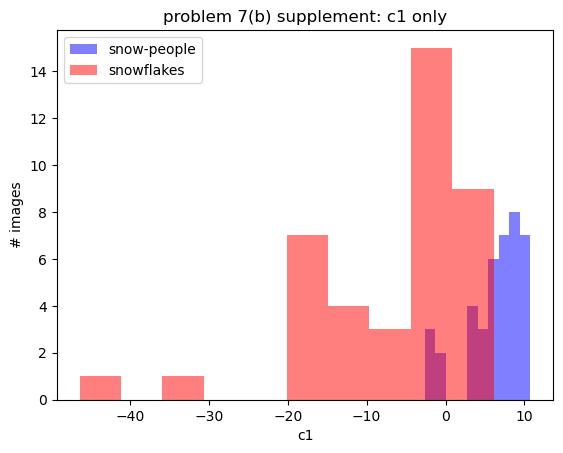

PyObject Text(24.000000000000007, 0.5, '# images')

In [ ]:
hist(c1[snowperson_indices], bins=10, color="blue", alpha=0.5, label="snow-people")
hist(c1[snowflake_indices], bins=10, color="red", alpha=0.5, label="snowflakes")
legend(loc="upper left")
title("problem 7(b) supplement: c1 only")
xlabel("c1")
ylabel("# images")